In [635]:
from datetime import datetime
from dateutil import parser
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.stattools import adfuller,kpss
from pandas.plotting import register_matplotlib_converters
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt

In [ ]:
#https://stackoverflow.com/questions/27607974/python-pandas-dataframe-any-way-to-set-frequency-programmatically

In [636]:
rcParams['figure.figsize'] = 15,6

In [637]:
warnings.simplefilter(action='ignore')

In [638]:
vendas = pd.read_csv(r"C:\testeseries_temprais\base_vendas.csv",sep=";")
vendas.columns

Index(['Código Nota Fiscal', 'Data de Envio', 'Status do Envio',
       'Subcategoria', 'Desconto %', 'Lucro', 'Quantidade', 'Valor da venda'],
      dtype='object')

In [639]:
dateparse = lambda x: pd.Timestamp(x).strftime('%Y-%m-%d')
vendas = pd.read_csv(r"C:\testeseries_temprais\base_vendas.csv"
         ,parse_dates=['Data de Envio'], index_col=['Data de Envio']
                     ,date_parser=dateparse,sep=";")



In [640]:
vendas.dropna(inplace=True)

In [641]:
vendas.drop_duplicates(inplace=True)

In [642]:
vendas[['Valor da venda','Desconto %','Quantidade','Lucro']] = vendas[['Valor da venda'
                                    ,'Desconto %','Quantidade','Lucro']].applymap(lambda k: str(k).replace('.','').replace(',','.').strip())

In [643]:
vendas[['Valor da venda','Desconto %','Quantidade','Lucro']] = vendas[['Valor da venda'
              ,'Desconto %','Quantidade','Lucro']].astype(float)

In [644]:
vendas = vendas.groupby(['Data de Envio'])[['Valor da venda','Desconto %','Quantidade','Lucro']].sum().reset_index()

In [645]:
vendas.set_index('Data de Envio',inplace=True)
vendas

,Valor da venda,Desconto %,Quantidade,Lucro
Data de Envio,,,,
2014-01-04,13840.0,1.00,29.0,2800.0
2014-01-05,700.0,0.00,5.0,220.0
2014-01-06,11144.0,0.60,31.0,4540.0
2014-01-07,6160.0,0.00,10.0,760.0
2014-01-08,3690.0,0.00,25.0,1390.0
...,...,...,...,...
2018-01-01,13048.0,5.82,70.0,4170.0
2018-02-01,15450.0,0.40,26.0,2370.0
2018-03-01,5700.0,1.20,22.0,320.0


Text(0, 0.5, 'Vendas')

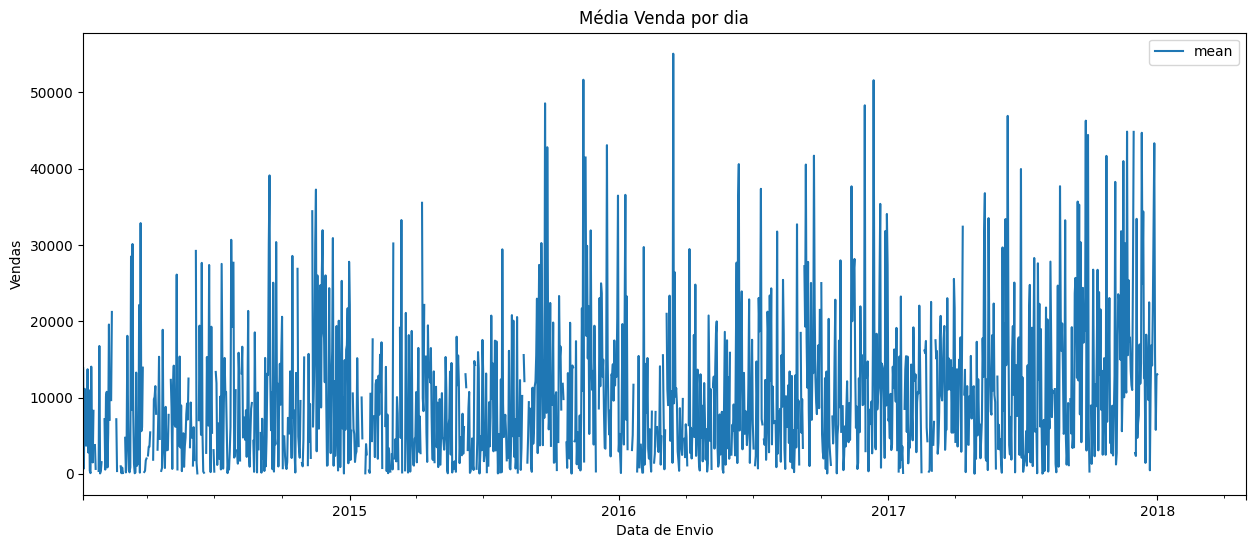

In [646]:
vendas['Valor da venda'].resample('D').apply([np.mean]).plot()
plt.title("Média Venda por dia")
plt.ylabel("Vendas")

Text(0, 0.5, 'Vendas')

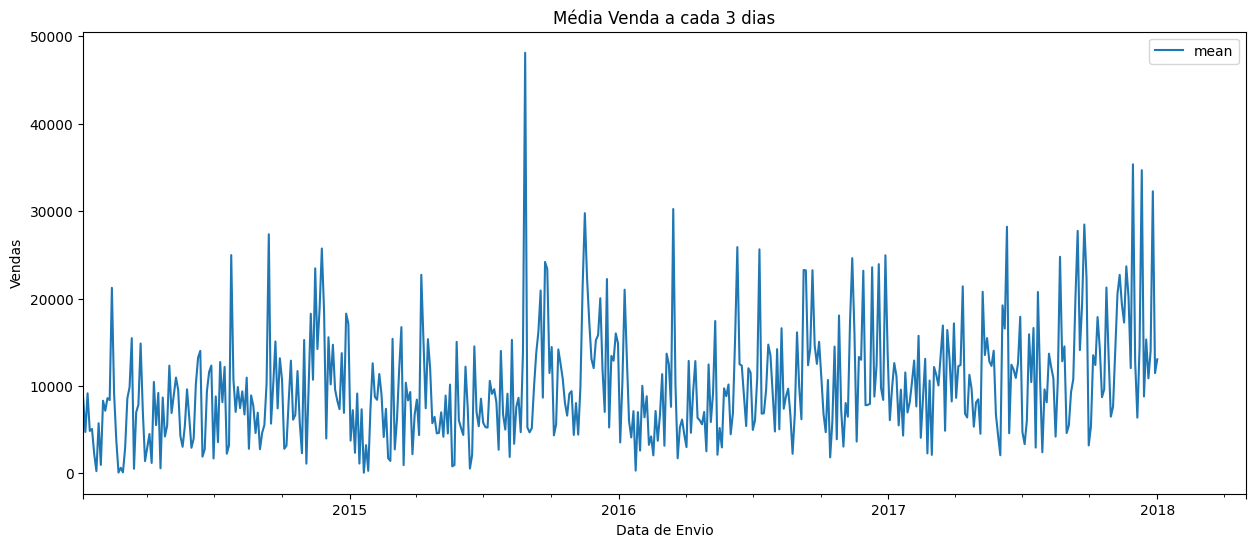

In [647]:
vendas['Valor da venda'].resample('3D').apply([np.mean]).plot()
plt.title("Média Venda a cada 3 dias")
plt.ylabel("Vendas")

In [648]:
vendas.corr()

,Valor da venda,Desconto %,Quantidade,Lucro
Valor da venda,1.000000,0.569657,0.812958,0.421966
Desconto %,0.569657,1.000000,0.702059,0.009358
Quantidade,0.812958,0.702059,1.000000,0.430479
Lucro,0.421966,0.009358,0.430479,1.000000


In [649]:
#orders = vendas.index = pd.to_datetime(vendas.index)
#orders.head()

In [650]:
box_colors = ['royalblue']

In [651]:
from matplotlib.patches import Polygon


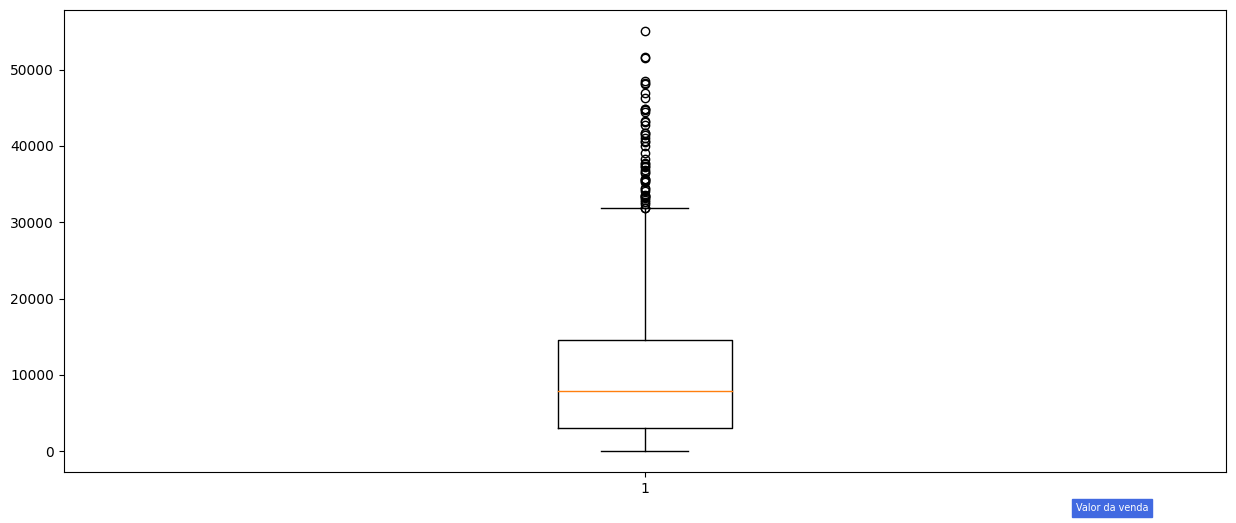

In [652]:

fig, ax = plt.subplots()
fig.canvas.manager.set_window_title('Vendas')
fig.text(0.80, 0.045, 'Valor da venda',
         color='white', backgroundcolor='royalblue', weight='roman', size='x-small')

ax.boxplot(vendas['Valor da venda'])

plt.show()

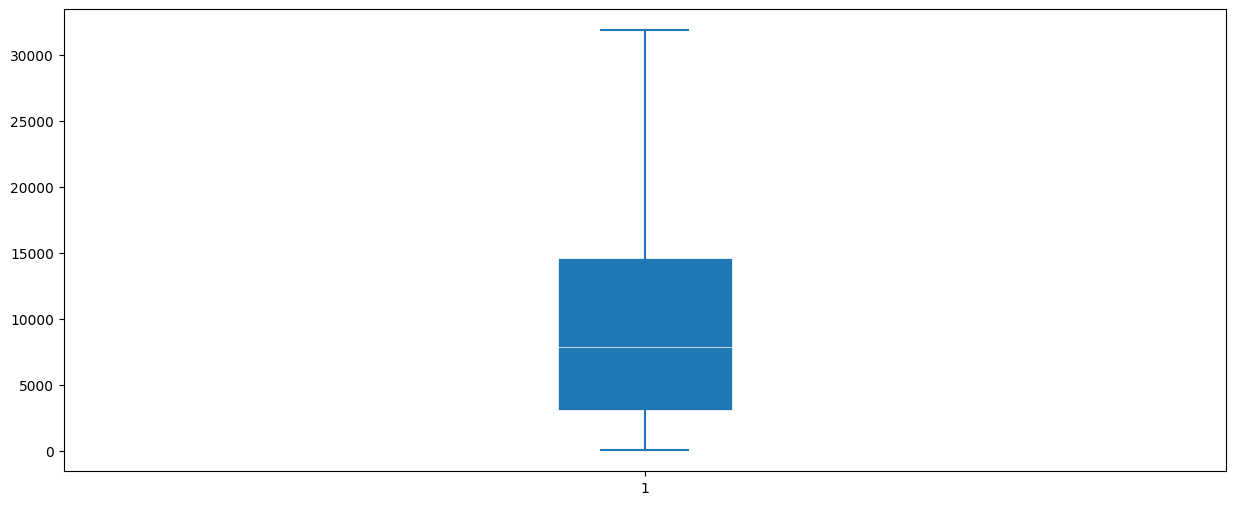

In [653]:



fig, ax = plt.subplots()
VP = ax.boxplot(vendas['Valor da venda'], patch_artist=True,
                showmeans=False, showfliers=False,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})


plt.show()

In [654]:
vendas = vendas[['Valor da venda','Desconto %','Quantidade','Lucro']]
vendas.reset_index()

,Data de Envio,Valor da venda,Desconto %,Quantidade,Lucro
0,2014-01-04,13840.0,1.00,29.0,2800.0
1,2014-01-05,700.0,0.00,5.0,220.0
2,2014-01-06,11144.0,0.60,31.0,4540.0
3,2014-01-07,6160.0,0.00,10.0,760.0
4,2014-01-08,3690.0,0.00,25.0,1390.0
...,...,...,...,...,...
1329,2018-01-01,13048.0,5.82,70.0,4170.0
1330,2018-02-01,15450.0,0.40,26.0,2370.0
1331,2018-03-01,5700.0,1.20,22.0,320.0
1332,2018-04-01,3440.0,0.20,23.0,1570.0


In [655]:
vendas.describe()

,Valor da venda,Desconto %,Quantidade,Lucro
count,1334.000000,1334.000000,1334.000000,1334.000000
mean,10272.818591,1.169408,28.386807,1812.610945
std,9425.518957,1.128544,21.884550,3386.912770
min,20.000000,0.000000,1.000000,-13330.000000
25%,3062.500000,0.200000,11.000000,100.000000
50%,7835.000000,0.800000,23.000000,910.000000
75%,14598.000000,1.700000,39.000000,3000.000000
max,55053.000000,6.800000,150.000000,22151.000000


In [656]:
def adf_test(timeseries):
    print("Resultados do Teste de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "estatistica de teste",
            "Valor - P",
            "#Lags usados",
            "Número de observações usadas",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Valor crítico (%s)" % key] = value
    print(dfoutput)


adf_test(vendas['Valor da venda'])

Resultados do Teste de Dickey-Fuller:
estatistica de teste           -7.420144e+00
Valor - P                       6.770160e-11
#Lags usados                    1.100000e+01
Número de observações usadas    1.322000e+03
Valor crítico (1%)             -3.435306e+00
Valor crítico (5%)             -2.863729e+00
Valor crítico (10%)            -2.567935e+00
dtype: float64


In [657]:
vendas.index

DatetimeIndex(['2014-01-04', '2014-01-05', '2014-01-06', '2014-01-07',
               '2014-01-08', '2014-01-09', '2014-01-10', '2014-01-11',
               '2014-01-12', '2014-01-13',
               ...
               '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30',
               '2017-12-31', '2018-01-01', '2018-02-01', '2018-03-01',
               '2018-04-01', '2018-05-01'],
              dtype='datetime64[ns]', name='Data de Envio', length=1334, freq=None)

In [666]:
def kpss_test(timeseries):
    print("Resultados do teste KPSS:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["estatistica de teste", "Valor - P", "#Lags usados"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Valor crítico (%s)" % key] = value
    print(kpss_output)

kpss_test(vendas['Valor da venda'])

Resultados do teste KPSS:
estatistica de teste     0.076515
Valor - P                0.100000
#Lags usados            12.000000
Valor crítico (10%)      0.347000
Valor crítico (5%)       0.463000
Valor crítico (2.5%)     0.574000
Valor crítico (1%)       0.739000
dtype: float64


In [668]:
y_diff = np.diff(vendas['Valor da venda'])
y_diff

array([ 470., -717.,  943., ...,  167., -229.,  213.])

<Axes: xlabel='Data de Envio'>

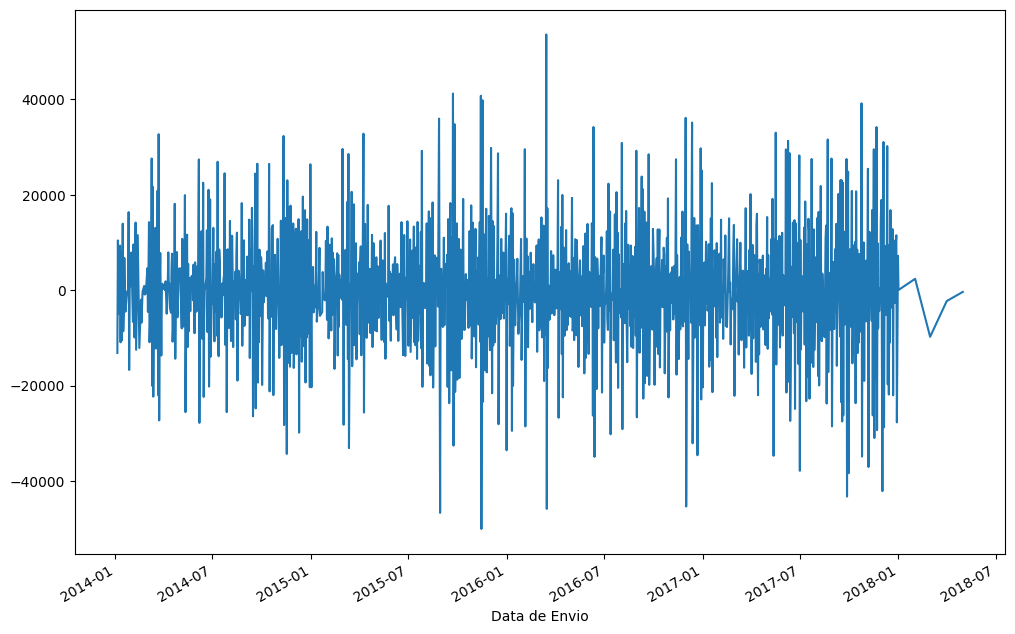

In [ ]:
vendas["Valor da venda_diff"] = vendas["Valor da venda"] - vendas["Valor da venda"].shift(
    1
)
vendas["Valor da venda_diff"].dropna().plot(figsize=(12, 8))

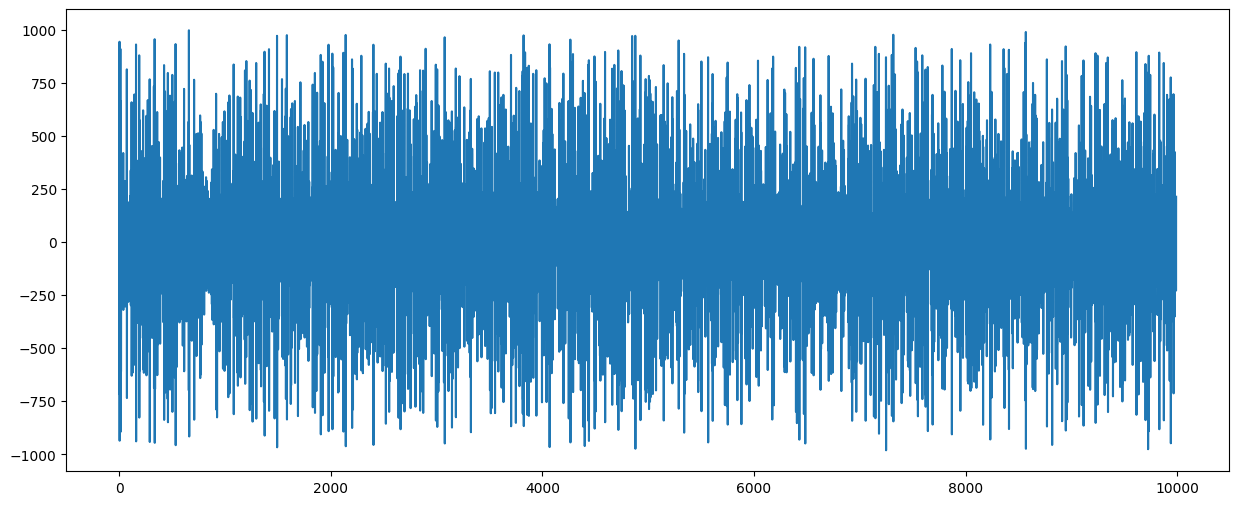

In [670]:
y_diff = np.diff(vendas['Valor da venda'])
plt.plot(y_diff)

In [ ]:
adf_test(vendas["Valor da venda_diff"].dropna())


Resultados do Teste de Dickey-Fuller:
estatistica de teste           -1.511362e+01
Valor - P                       7.633931e-28
#Lags usados                    1.600000e+01
Número de observações usadas    1.316000e+03
Valor crítico (1%)             -3.435329e+00
Valor crítico (5%)             -2.863739e+00
Valor crítico (10%)            -2.567941e+00
dtype: float64


In [ ]:
kpss_test(vendas["Valor da venda_diff"].dropna())


Resultados do teste KPSS:
estatistica de teste     0.025645
Valor - P                0.100000
#Lags usados            51.000000
Valor crítico (10%)      0.347000
Valor crítico (5%)       0.463000
Valor crítico (2.5%)     0.574000
Valor crítico (1%)       0.739000
dtype: float64


<Axes: xlabel='Data de Envio'>

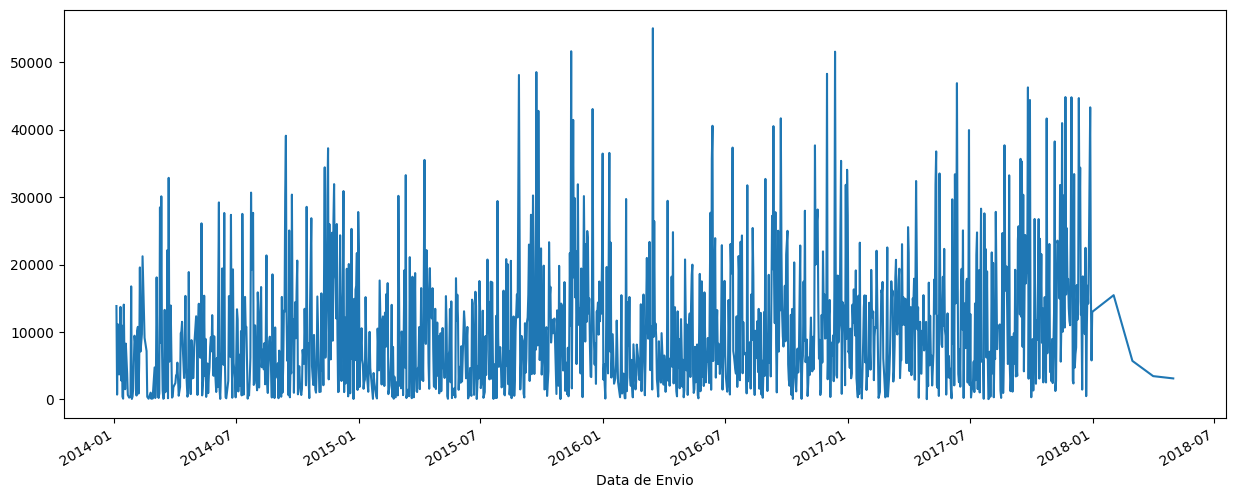

In [ ]:
vendas['Valor da venda'].plot()

In [ ]:
#Medias moveis

In [ ]:
vendas[['Data de Envio','Valor da venda']]

In [ ]:
vendas = pd.read_csv(r"C:\testeseries_temprais\base_vendas.csv",sep=";")
vendas['Data de Envio'] = vendas['Data de Envio'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m'))
orders = vendas[['Data de Envio','Valor da venda']]
orders = orders.groupby('Data de Envio')['Valor da venda'].sum().reset_index()
orders.dropna(inplace=True)
orders = orders[orders['Data de Envio'] >= '2017-01-01']
orders.set_index('Data de Envio',inplace=True)


In [ ]:
optimal_n = None
best_mse = None


db = orders[['Valor da venda']].values.astype('float32')
mean_results_for_all_possible_n_values = np.zeros(int(len(db) / 2-2))

In [ ]:
for n in range(3, int(len(db)/ 2 + 1)):
    mean_for_n = np.zeros(len(db) - n)
    for i in range(0, len(db) - n):
        mean_for_n[i] = np.power(np.mean(db[:,0][i:i+n])-db[i+n][0],2)
    mean_results_for_all_possible_n_values[n-3] = np.mean(mean_for_n)
    
    
optimal_n = np.argmin(mean_results_for_all_possible_n_values) + 3
best_mse = np.min(mean_results_for_all_possible_n_values)

print("MSE = %s" % mean_results_for_all_possible_n_values)
print("Melhor MSE = %s" % best_mse) 
print("Otimo n = %s" % optimal_n) 

MSE = [2.90805341e+08 3.69774472e+08 4.37011901e+08 5.02083109e+08
 5.84570119e+08 6.47662959e+08]
Melhor MSE = 290805340.569053
Otimo n = 3


In [ ]:
orders.index

print("MA = %s" % np.mean(db[:,0][len(db)-optimal_n:len(db)]))

MA = 408.0


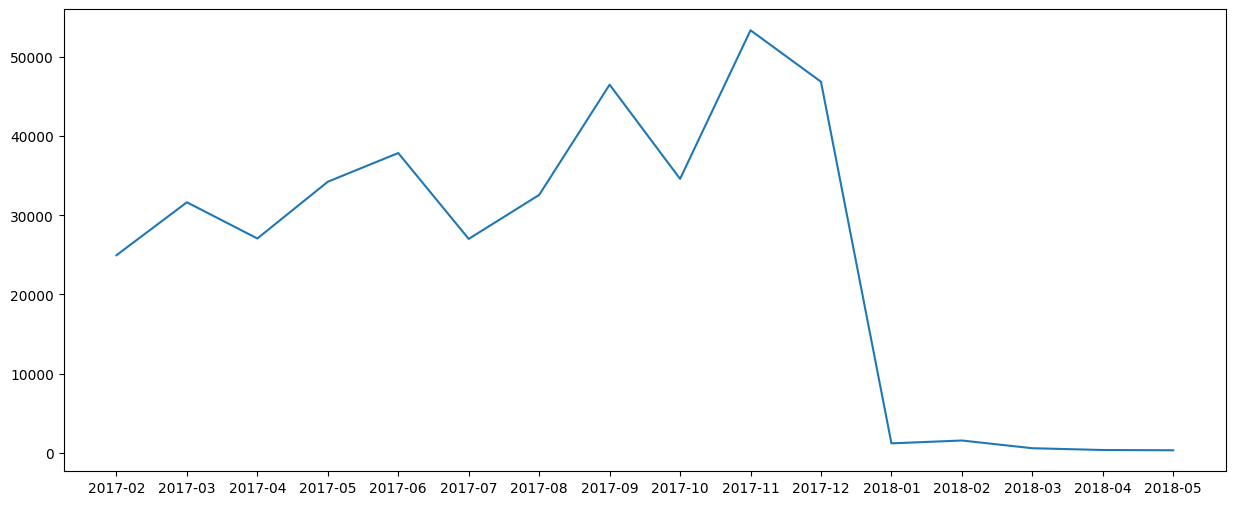

In [ ]:
plt.plot(orders)
plt.show()

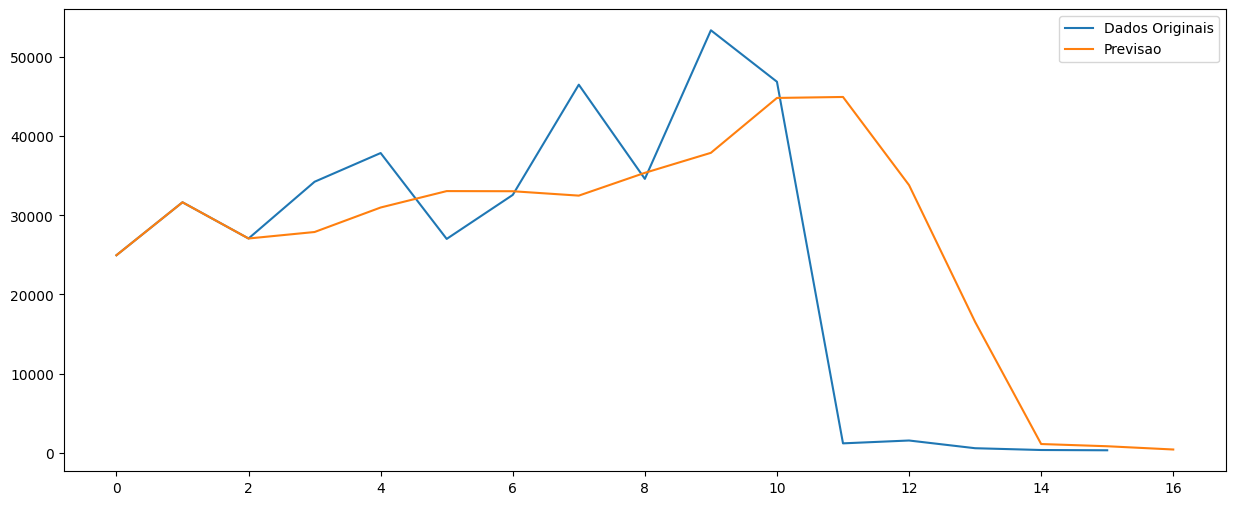

In [ ]:
forecast = np.zeros(len(db)+1)
for i in range(0, optimal_n):
    forecast[i] = db[i][0]
for i in range(0, len(db) - optimal_n + 1):
    forecast[i+optimal_n] = np.mean(db[:,0][i:i+optimal_n])
plt.plot(db[:,0], label='Dados Originais')
plt.plot(forecast, label='Previsao')
plt.legend()
plt.show()


In [ ]:
#decomposiçãos

In [ ]:
vendas = pd.read_csv(r"C:\testeseries_temprais\base_vendas.csv",sep=";")
vendas[['Data de Envio','Valor da venda']]
orders = vendas['Data de Envio']

,Data de Envio,Valor da venda
0,11/11/2016,262.0
1,11/11/2016,732.0
2,16/06/2016,15.0
3,18/10/2015,958.0
4,18/10/2015,22.0
...,...,...
9989,23/01/2014,25.0
9990,03/03/2017,92.0
9991,03/03/2017,259.0
9992,03/03/2017,30.0


In [ ]:
orders['Valor da venda']

Data de Envio
2017-02    24961.861
2017-03    31656.163
2017-04    27079.017
2017-05    34251.451
2017-06    37880.116
2017-07    27025.770
2017-08    32585.935
2017-09    46519.844
2017-10    34614.850
2017-11    53396.562
2017-12    46889.602
2018-01     1185.208
2018-02     1545.000
2018-03      570.000
2018-04      344.000
2018-05      310.000
Name: Valor da venda, dtype: float64

In [ ]:
orders.head(3)

,Valor da venda
Data de Envio,
2017-02,24961.861
2017-03,31656.163
2017-04,27079.017


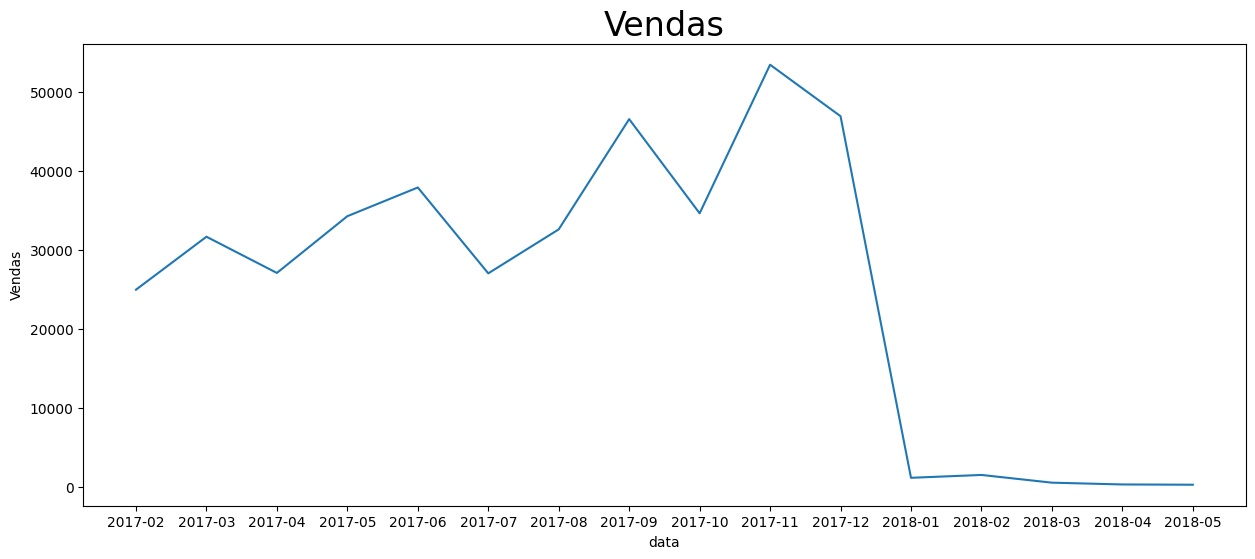

In [ ]:
plt.plot(orders)
plt.title("Vendas", fontsize=24)
plt.ylabel("Vendas")
plt.xlabel("data")
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [663]:
dateparse = lambda x: pd.Timestamp(x).strftime('%Y-%m')


vendas = pd.read_csv(r"C:\testeseries_temprais\base_vendas.csv",sep=";")
                     
vendas = vendas[vendas['Valor da venda'] > 0]

orders = vendas[['Valor da venda','Data de Envio']]
orders = orders.groupby('Data de Envio')['Valor da venda'].sum().reset_index()
orders


,Data de Envio,Valor da venda
0,01/01/2015,2042.737
1,01/01/2016,293.000
2,01/01/2017,698.000
3,01/01/2018,1185.208
4,01/02/2015,183.000
...,...,...
1329,31/10/2017,270.000
1330,31/12/2014,2779.000
1331,31/12/2015,3492.549
1332,31/12/2016,2478.563


In [664]:


orders['Data de Envio'] = orders['Data de Envio'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m-%d'))
ordeers = orders[['Data de Envio','Valor da venda']]

orders.set_index('Data de Envio',inplace=True)

In [ ]:
#https://stackoverflow.com/questions/27607974/python-pandas-dataframe-any-way-to-set-frequency-programmatically

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [665]:
result =  seasonal_decompose(orders, model='multiplicative', period=12)